In [1]:
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib.pyplot as plt
import itertools

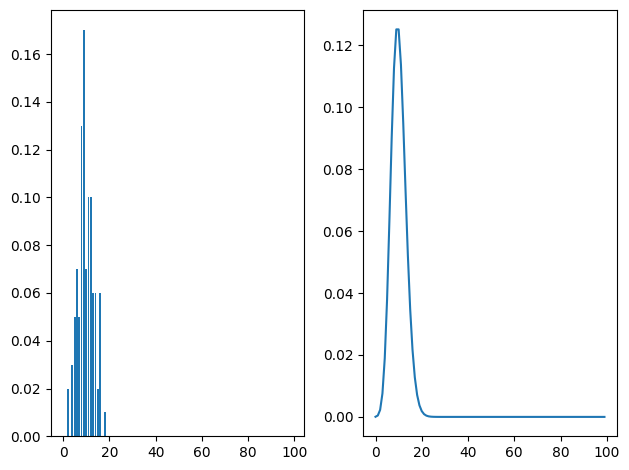

In [22]:
def compare_discrete(distrib, size=1000):
    x = distrib.rvs(size=size)
    freq = [np.mean(x==i) for i in range(100)]
    
    t = np.arange(start=0, stop=100, step=1)
    fig1, axs1 = plt.subplots(1, 2, sharex=True, tight_layout=True)
    axs1[0].bar(x=range(0,100), height=freq)
    axs1[1].plot(t, distrib.pmf(t))
    

distrib_binom = spst.binom(n=100, p=0.4)
distrib_poisson = spst.poisson(mu=10)   
compare_discrete(distrib_poisson,100)

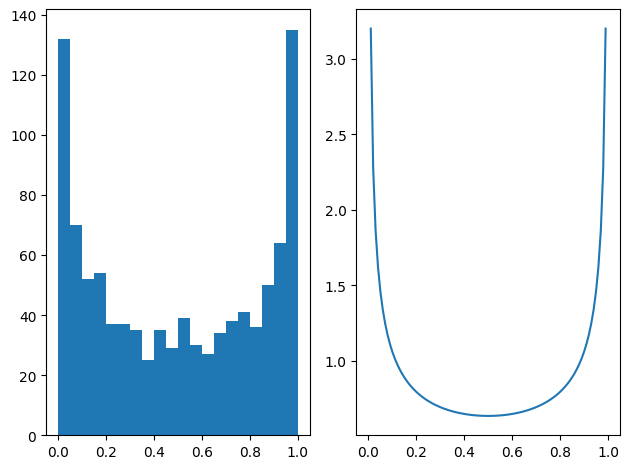

In [29]:
def compare_continuous(distrib, start, stop, size=1000):
    x = distrib.rvs(size=size)
    step = (stop - start)/100
    t = np.arange(start=start, stop=stop, step=step)
    fig2, axs2 = plt.subplots(1, 2, sharex=True, tight_layout=True)
    axs2[0].hist(x, range=(start,stop), bins=20)
    axs2[1].plot(t, distrib.pdf(t))
    

distrib_norm = spst.norm(loc=0, scale=1)
distrib_beta = spst.beta(a=0.5, b=0.5)
compare_continuous(distrib_beta, 0, 1, 1000)

In [31]:
def loglike(distrib, params, sample):
    try:
        return np.sum(distrib.logpdf(sample, *params), axis=0)
    except AttributeError:
        return np.sum(distrib.logpmf(sample, *params), axis=0)

-2222.8505253256135

Most possible $\mu$ : 1.0249999999999893


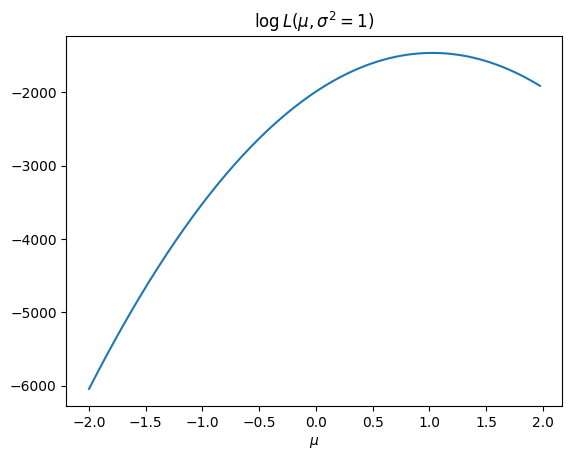

In [54]:
x = spst.norm(loc=1, scale=1).rvs(size=1000) # 假设这是一个未知均值的正态分布采样
par = np.arange(-2.0, 2.0, 0.025)
ll = [loglike(spst.norm,(i,1), x) for i in par]

fig3, ax3 = plt.subplots()
ax3.plot(par, ll)
ax3.set_title('$\log L(\mu,\sigma^2=1)$')
ax3.set_xlabel('$\mu$')

print('Most possible \mu :', par[np.argmax(ll)])

Text(0, 0.5, '$\\sigma^2$')

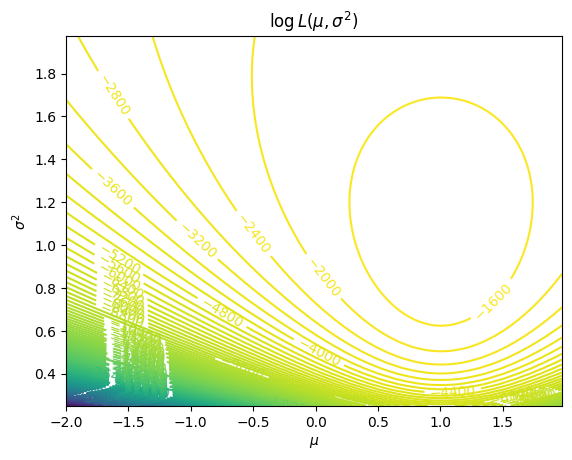

In [73]:
x = spst.norm(loc=1, scale=1).rvs(size=1000) # 假设这是一个未知均值的正态分布采样
par_mu = np.arange(-2.0, 2.0, 0.025)
par_sigma = np.arange(0.25, 2.0, 0.025)
ll = [[loglike(spst.norm,(i,j), x) for i in par_mu] for j in par_sigma]

fig4, ax4 = plt.subplots()
CS = ax4.contour(par_mu, par_sigma, np.asarray(ll), levels=250)
ax4.clabel(CS, inline=1, fontsize=10)
ax4.set_title('$\log L(\mu,\sigma^2)$')
ax4.set_xlabel('$\mu$')
ax4.set_ylabel('$\sigma^2$')


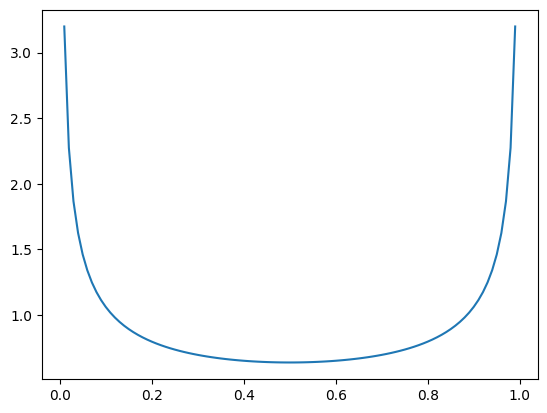

In [74]:
distrib = spst.beta(a=0.5,b=0.5)
t = np.arange(start=0, stop=1, step=0.01)
fig1, ax1 = plt.subplots()
ax1.plot(t, distrib.pdf(t))

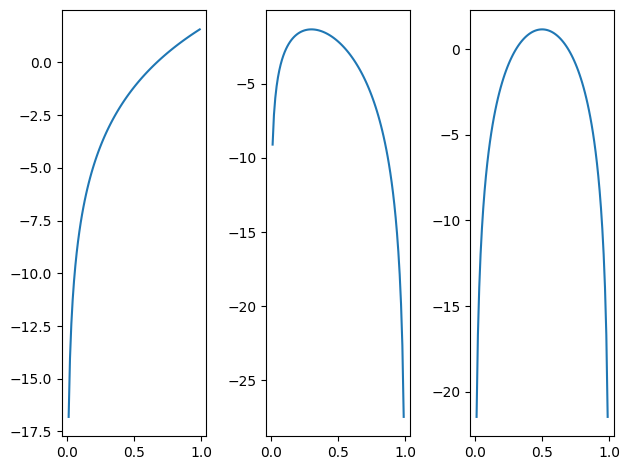

In [83]:
nbin = 10
alph, beta = (5, 1)

sampl_dist = spst.binom(n=nbin, p=0.2)
prior_dist = spst.beta(a=alph, b=beta)

x = sampl_dist.rvs()
post_dist = spst.beta(a=alph+x, b=beta+nbin-x)

t = np.arange(start=0.01, stop=1, step=0.01)
ll = [loglike(spst.binom, (nbin,p), x) for p in t]

fig, axs = plt.subplots(1, 3, sharex=True, tight_layout=True)
axs[0].plot(t, prior_dist.logpdf(t))
axs[1].plot(t, ll)
axs[2].plot(t, post_dist.logpdf(t))